In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
plt.rc('font', family='serif', size=16)

In [3]:
L = 1.0
nx = 51
dx = L / (nx-1)
x = np.linspace(0.0, L, num=nx)

alpha = 1.22e-3
q = 0.0

T0 = np.zeros(nx)
T0[0] = 100.0

In [13]:
def btcs(u0, nt, dt, dx, alpha, q=0.0):
    u = u0.copy()
    sigma = alpha * dt / dx**2
    A = lhs_operator(u0.size - 2, sigma)
    for n in range(nt):
        b = rhs_vector(u, sigma, q * dx)
        u[1:-1] = np.linalg.solve(A, b)
        u[0] = u0[0]
        u[-1] = u[-2] + q * dx
    return u

In [14]:
def lhs_operator(N, sigma):
    # Diagonal coefficients
    D = np.diag((2 + 1/sigma) * np.ones(N))
    D[-1, -1] = 1 + 1/sigma
    # Upper diagonal
    U = np.diag(-1.0 * np.ones(N-1), k=1)
    # Lower diagonal
    L = np.diag(-1.0 * np.ones(N-1), k=-1)
    # Assemble A
    A = D + U + L
    return A

In [17]:
def rhs_vector(u, sigma, qdx):
    b = u[1:-1] / sigma
    # Dirichlet
    b[0] += u[0]
    # Neumann
    b[-1] += qdx
    return b

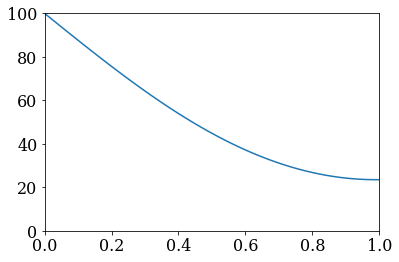

In [19]:
nt = 1000
sigma = 0.5
dt = sigma * dx**2 / alpha

T = btcs(T0, nt, dt, dx, alpha, q=0.0)

plt.plot(x, T)
plt.xlim(0.0, L)
plt.ylim(0.0, 100.0);